In [3]:
# 분석 필요 패키지 임포트
import numpy as np      # NumPy: 배열분석
import pandas as pd     # Pandas: 데이터 수집 및 수정
import datetime         # 시간처리(내장 파이썬)
import matplotlib.pyplot as plt   # 시각화 그래프
import seaborn as sns # 시각화 그래프 최신버전

In [4]:
# 실험 결과값 데이터를 불러와 데이터 프레임 형성
pf = pd.read_csv(r"C:\ITStudy\00_git\Self_Study_DataMining\secom\secom.data", sep=' ', header=None)

main_data = pd.DataFrame(pf)

# 데이터 확인
main_data.info()
main_data.describe(include='all')

# 데이터의 처음과 끝 확인
main_data.head()
main_data.tail()

# main 데이터의 결측치 처리
main_data.replace(np.nan, 0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 590 entries, 0 to 589
dtypes: float64(590)
memory usage: 7.1 MB


In [5]:
# 시료의 성공여부와 측정일자가 기록된 csv 읽어오기
pf = pd.read_csv(r"C:\ITStudy\00_git\Self_Study_DataMining\secom\secom_labels.data",sep=' ', names=['is_success', 'Date'])

label_data = pd.DataFrame(pf)

# 데이터 확인
label_data.info()
label_data.describe()

# 데이터의 처음과 끝 확인
label_data.head()
label_data.tail()

# 측정일자 데이터 날짜시간형 변환
label_data.Date = label_data.Date.astype('datetime64[ns]')
label_data.is_success = label_data.is_success.apply(lambda x: 'O' if x == 1 else 'X')

label_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   is_success  1567 non-null   int64 
 1   Date        1567 non-null   object
dtypes: int64(1), object(1)
memory usage: 24.6+ KB


,is_success,Date
0,X,2008-07-19 11:55:00
1,X,2008-07-19 12:32:00
2,O,2008-07-19 13:17:00
3,X,2008-07-19 14:43:00
4,X,2008-07-19 15:22:00
...,...,...
1562,X,2008-10-16 15:13:00
1563,X,2008-10-16 20:49:00
1564,X,2008-10-17 05:26:00
1565,X,2008-10-17 06:01:00


In [6]:
# 라벨과 메인 데이터를 합치기
secom_data = label_data.join(main_data)

In [7]:
# 만든 데이터 프레임으로 다양한 값들 구하기
# 마지막 성공 측정 시간
secom_data[secom_data.is_success == 'O']['Date'].iloc[-1] # -1인덱싱을 달리하여 사이 간격 측정등 다양한 value 창출 가능

Timestamp('2008-10-15 02:42:00')

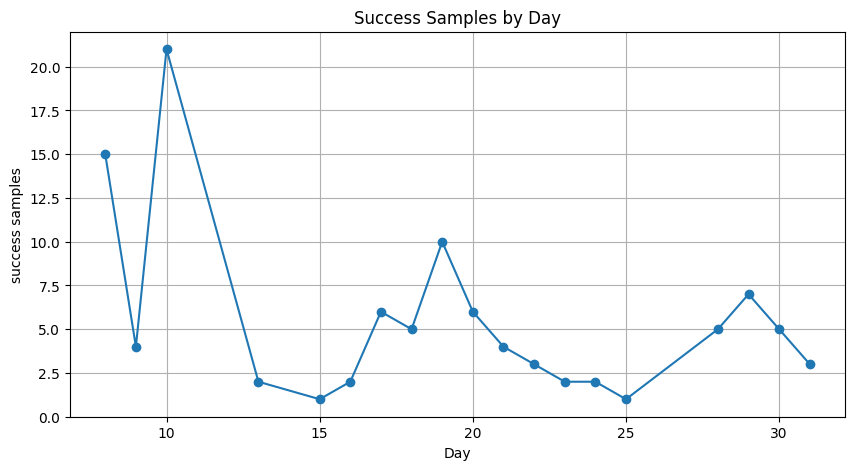

In [11]:
# O, X 시각화
# 'Date' 컬럼에서 일(day)만 추출하는 새로운 컬럼 추가
secom_data['day'] = secom_data['Date'].dt.day

# 성공한 샘플만 필터링
success_data = secom_data[secom_data['is_success'] == 'O']

# 일(day)별 성공 샘플 개수 집계
day_success_count = success_data.groupby('day').size()

plt.figure(figsize=(10,5))
plt.plot(day_success_count.index, day_success_count.values, marker='o')
plt.xlabel('Day')
plt.ylabel('success samples')
plt.title('Success Samples by Day')
plt.grid(True)
plt.show()